In [351]:
# Import des librairies de base pour préparer et visualiser mes données
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [352]:
# Téléchargement de mes données sources
df = pd.read_csv(r'C:\Users\k-joubel\Desktop\DU\SORBONNE\2025\Python\PROJET1\DATA\data.csv')

# 1-Préparation des données

In [353]:
# Je commence par regarder quelles sont les colonnes présentes dans mon dataset
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


##### Description des colonnes :
Dix caractéristiques à valeur réelle sont calculées pour chaque noyau cellulaire :

a) rayon ('radius') (moyenne des distances entre le centre et les points du périmètre)
b) texture ('texture') (écart-type des valeurs en niveaux de gris)
c) périmètre ('perimeter')
d) surface ('area')
e) douceur ('smoothness') (variation locale de la longueur des rayons)
f) compacité ('compactness') (périmètre^2 / surface - 1,0)
g) concavité ('concavity') (gravité des parties concaves du contour)
h) points concaves ('concave points') (nombre de parties concaves du contour)
i) symétrie ('symmetry')
j) dimension fractale ('fractal dimension') ("approximation du trait de côte" - 1)

La moyenne, l'erreur-type et la "pire" ou la plus grande (moyenne des trois
plus grandes valeurs) de ces caractéristiques ont été calculées pour chaque image,
, ce qui donne 30 caractéristiques. Par exemple, le champ 3 correspond au rayon moyen, le champ
13 au rayon SE et le champ 23 au pire rayon.

Toutes les valeurs des caractéristiques sont recodées avec quatre 




In [354]:
# Je souhiate ensuite visualiser quelques lignes de données pour voir à quoi elles ressemblent
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [355]:
# Je sais que la colonne "diagnosis" est celle que je devrai prédire in fine.
# Je remarque que la colonne 32 "Unnamed: 32" est vide.
# je veux donc la supprimer
df = df.drop('Unnamed: 32', axis=1)

In [356]:
# Je vérifie le nombre de lignes, le type données, les valeurs manquantes 
# (à priori il n'y en a pas car les données proviennent d'un cas Kaggle)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [357]:
# Le Dataset comporte donc aucune donnée manquante.
# Le type de données est bien respecté à part la varibale "id" 
# est reconnue comme une variable d'entiers. 
# Ca ne doit pas être le cas, je dois donc le changer en "str".
df['id'] = df['id'].astype(str)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    object 
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [358]:
# Je vérifie ensuite s'il y a plusierus lignes pour une même patiente
# (ce qui ne devrait pas être le cas).
doublons = df[df.duplicated(subset=['id'])]
print(doublons)

Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 32 columns]


In [359]:
# Je regarde les stats de base pour les colonnes "numériques" : Float or Integer
print(df.describe())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

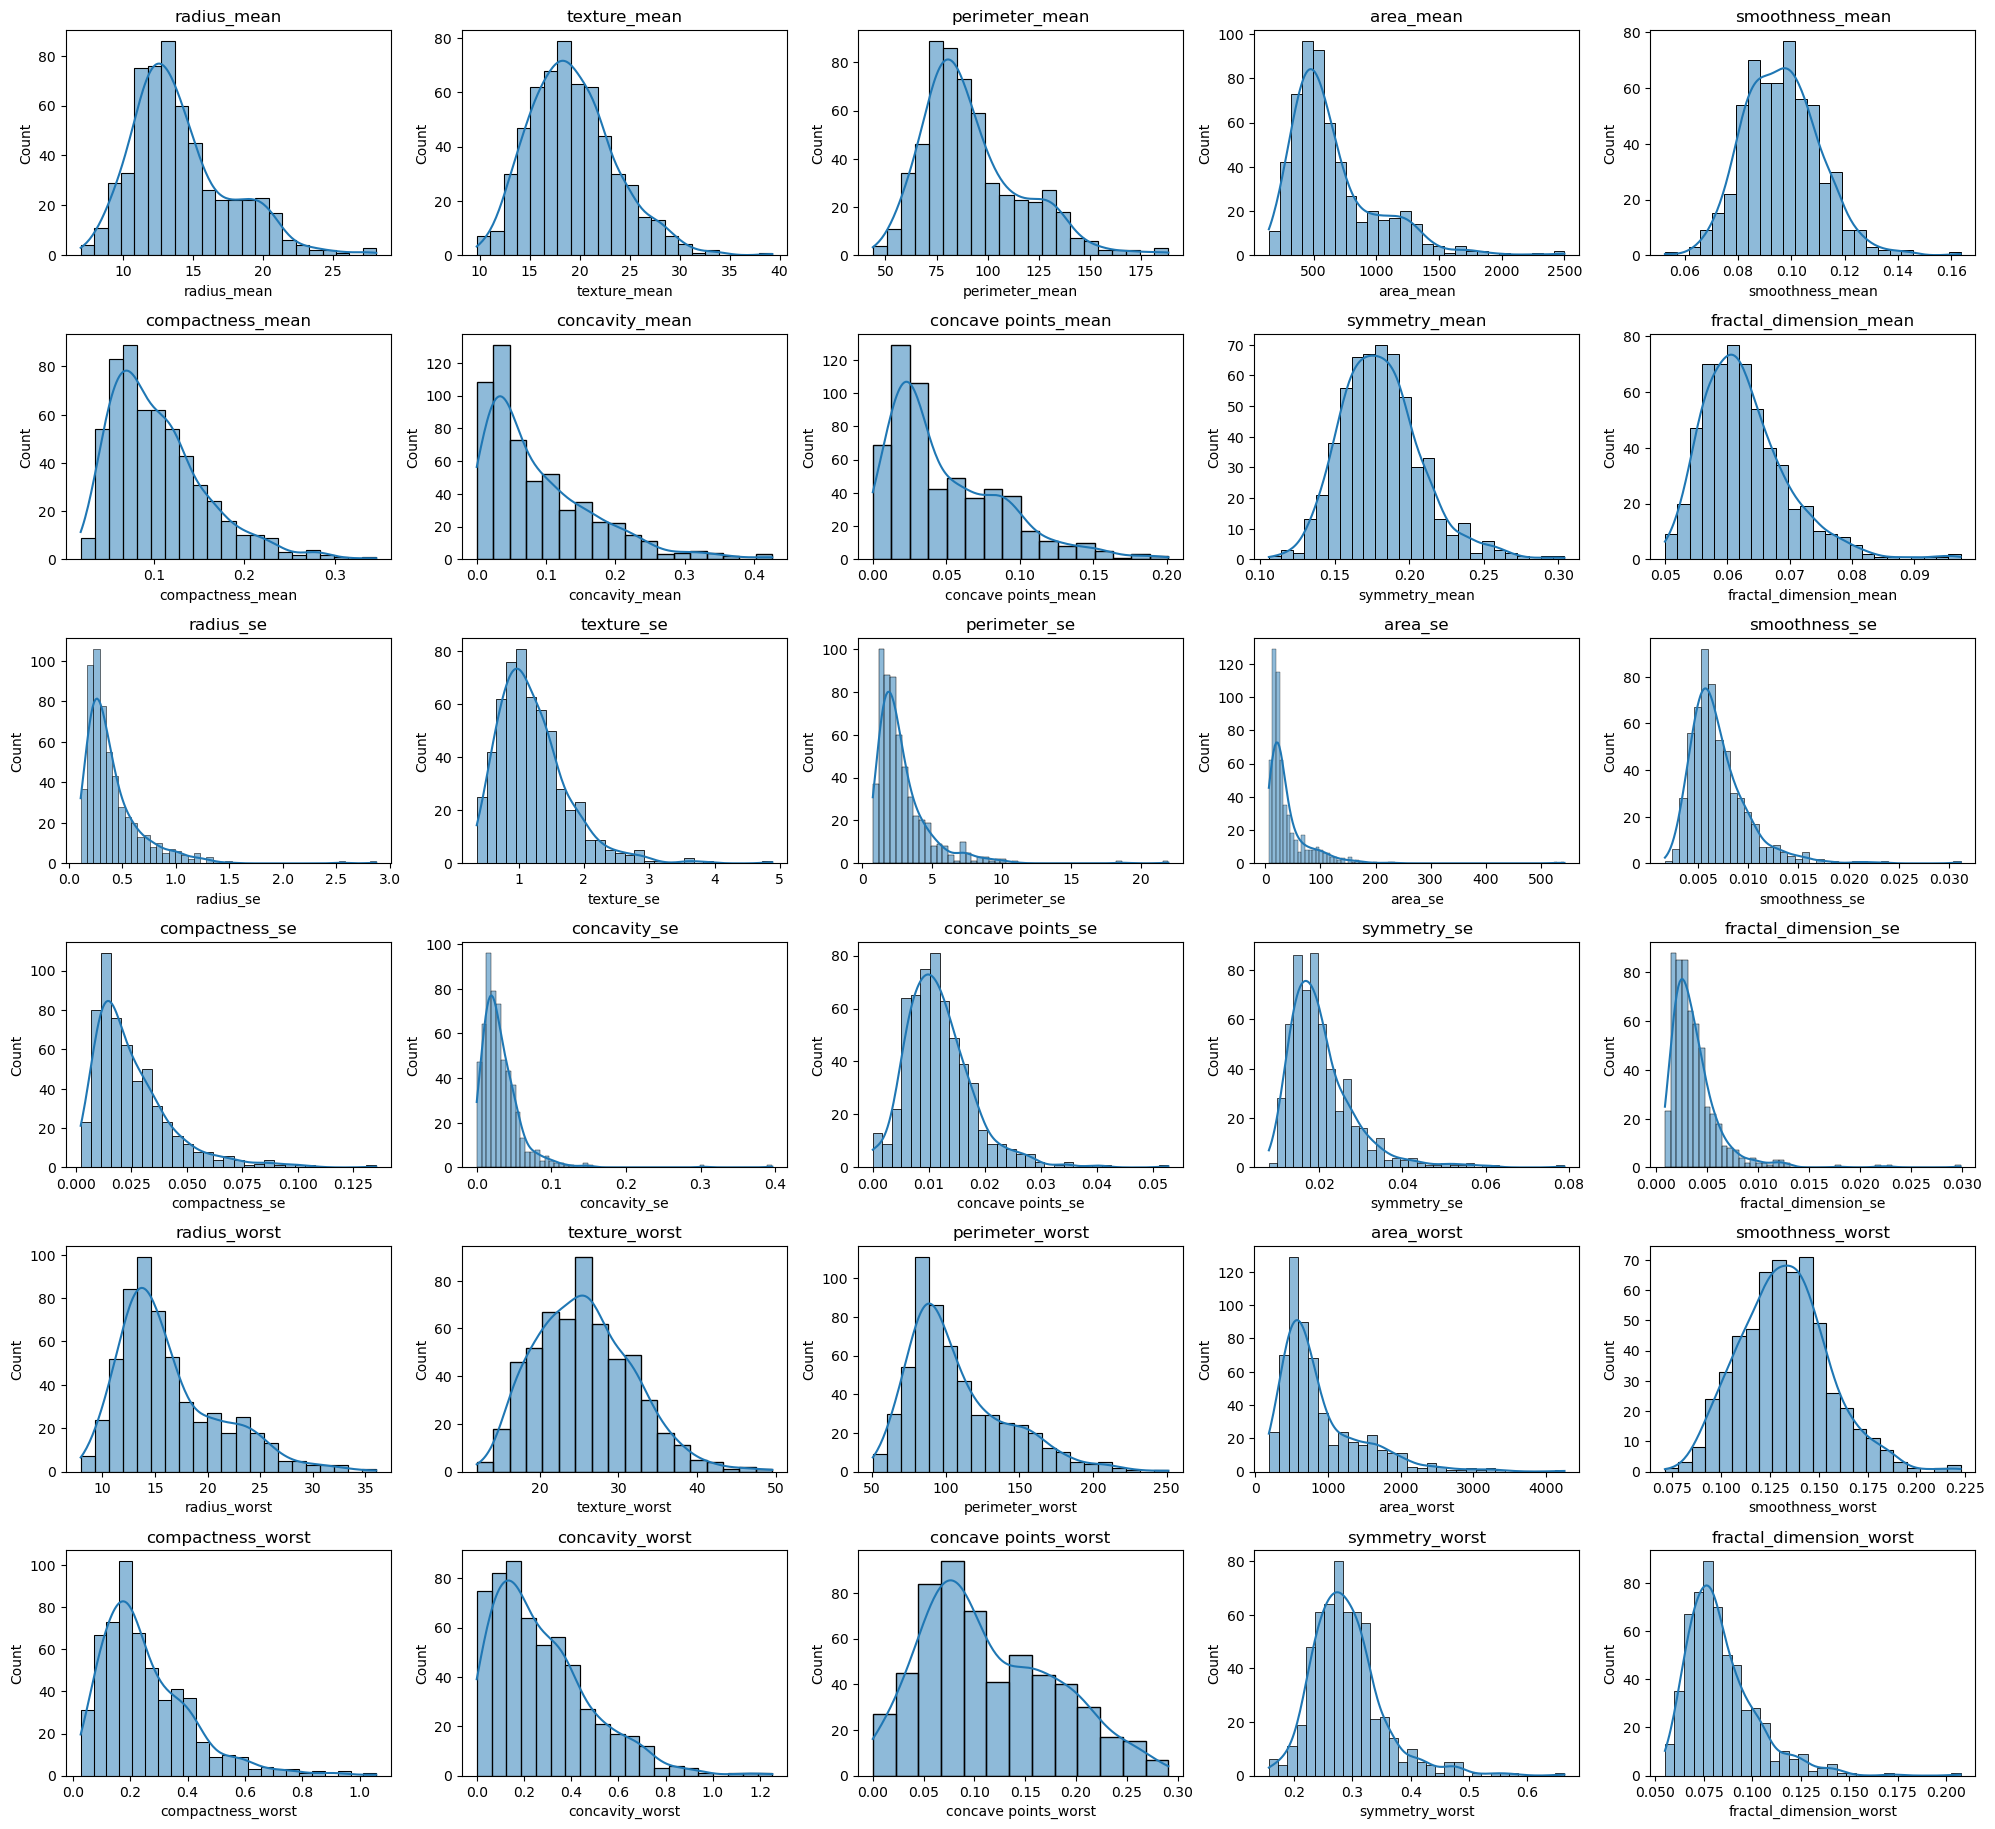

In [360]:
# je souhiate afficher la distribution des valeurs pour chaque variable numérique.
# Je définie la taille des figures car le premier rendu était illisible.
plt.figure(figsize=(ncols*4, nrows*3)) 
# Ensuite pour chaque variable numérique ayant un index i allant de 0 à 29 je dessine un histogramme
for i, col in enumerate(num_vars):
     plt.subplot(nrows, ncols, i + 1)
     # kde=True pour ajouter la courbe de densité
     sns.histplot(df[col], kde=True)  
     plt.title(col)
# J'ajoute la ligne suivante pour éviter les chevauchements des graphiques
plt.tight_layout()
plt.show()

In [361]:
# Je remarque peu d'ouliers de facon visuel. 
# Mais en santé on se méfie toujours des données semblant être des Outliers 
# car elles peuvent correspondre à des cas particuliers.
# J'anticipe l'apprentissage de mon modèle de prédiction en regardant 
# les variables fortement corrélées qui peuvent impacter 
# fortement la performance de mon modèle
df_num = df.select_dtypes(include='number')
correlation_matrix = df_num.corr() 
print(correlation_matrix)

                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -

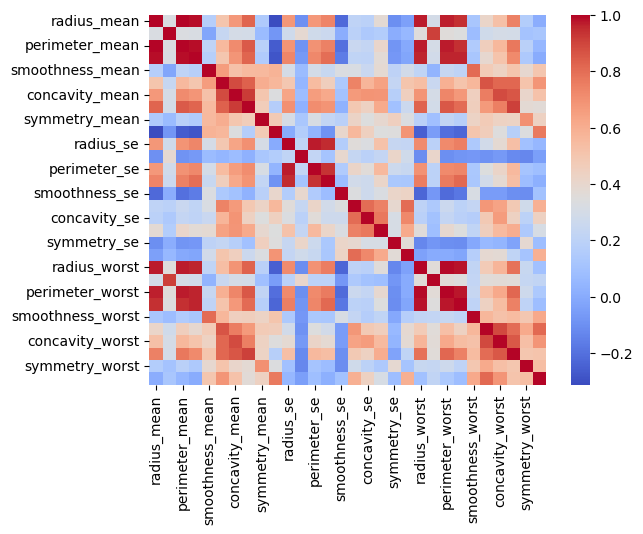

In [362]:
# Je génère un matrice de corrélation pour mieux visualiser 
# les dépendances entre les variables (features)
sns.heatmap(df_num.corr(), annot=False, cmap='coolwarm')
plt.show()

In [363]:
# Maitrisant mal les méthode de réduction de variables pour le moment : 
# PCA, Lasso etc. je décide de supprimer manuellement (même si c'est plus long)
# les vairables des paires corrélées
df_clean = df.drop(columns=['perimeter_mean', 'area_mean', 'fractal_dimension_se', 'radius_worst', 'perimeter_worst', 
                            'fractal_dimension_worst', 'smoothness_se', 'symmetry_se', 'area_worst'])
print(df_clean)

           id diagnosis  radius_mean  texture_mean  smoothness_mean  \
0      842302         M        17.99         10.38          0.11840   
1      842517         M        20.57         17.77          0.08474   
2    84300903         M        19.69         21.25          0.10960   
3    84348301         M        11.42         20.38          0.14250   
4    84358402         M        20.29         14.34          0.10030   
..        ...       ...          ...           ...              ...   
564    926424         M        21.56         22.39          0.11100   
565    926682         M        20.13         28.25          0.09780   
566    926954         M        16.60         28.08          0.08455   
567    927241         M        20.60         29.33          0.11780   
568     92751         B         7.76         24.54          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2

In [364]:
#Sauvegarde
df_clean.to_csv('data_nettoye.csv')

# Entrainement d'un modèle de ML afin de prédire la malignité d'une tumeur

In [365]:
# J'importe ensuite les librairies scikit-learn 
# afin d'avoir accès aux bons algorythmede 
# et pouvoir effectuer l'apprentissage de mon modèle.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib



In [366]:
# La vraible que je souhiate prédire est 'diagnosis'. 
# Je souhiate vérifier quelles sont les différentes "valeurs" 
# de type Objet dans cette variable
print(df_clean['diagnosis'].unique())

['M' 'B']


In [367]:
# je veux connaitre la fréquence de chaque valeur
print(df_clean['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [368]:
# Les données sont actuellement sous forme de texte 
# alors que j'aimerais les avoir sous forme 
# numérique binaire à savoir : '1' si Malin et '0' si Bénin 
df_clean['diagnosis'] = df_clean['diagnosis'].replace({'M': 1, 'B': 0})
print(df_clean['diagnosis'].unique())

[1 0]


In [369]:
# afin de ne pas lister une à une les varaibles de mon dataset pour entrainer mon/mes modèles,
# je sépare ma variable à prédire càd diagnosis ainsi que mon ID patient des autres variables
# La variable patients étant en position 0 et la variable à prédire étant en position 1 :
X = df_clean.iloc[:, 2:]
Y = df_clean.iloc[:, 1]
print(X.columns.tolist())

['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [370]:
# Je sépare ensuite mon dataset en 2 partie : une partie entrainement : train
# afin de pouvoir entrainer mes modèles 
# et une partie Test pour les tester/ J'utilise le ratio 70/30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 
# le nombre 42 est ici arbitraire, cela pourrait être tout autre entier 
# (Le 42 est celui utilisé de facon useulle)

# Je normalise mes données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modèle de Foret aléatoire

In [371]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [372]:
# prédiction et évaluaiton du modèle
Y_pred_rf = rf.predict(X_test)
print("\n=== Performance Random Forest ===")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_rf):.2f}")
print(confusion_matrix(Y_test, Y_pred_rf))
print(classification_report(Y_test, Y_pred_rf))


=== Performance Random Forest ===
Accuracy: 0.95
[[105   3]
 [  6  57]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



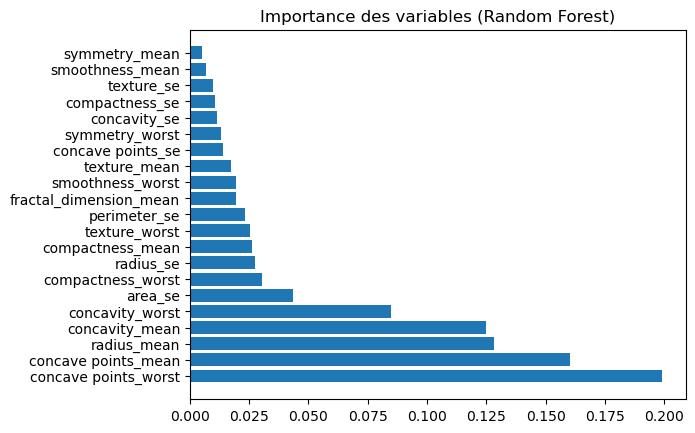

In [373]:
# Visulation des features importantes
#import matplotlib.pyplot as plt

# Création d'un DataFrame pour les importances
feature_importances = pd.DataFrame({
     'Feature': X.columns,
     'Importance': rf.feature_importances_
 }).sort_values(by='Importance', ascending=False)

# Visualisation
#plt.figure(figsize=(10,6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Importance des variables (Random Forest)')
plt.show()

In [374]:
# Je choisis uniquement les variables d'importance pour la WebApp
# car j'ai eu un beug dans ma première version
selected_features_rf = [
     'concave points_mean', 
     'concave points_worst', 
     'radius_mean', 
     'concavity_mean', 
     'concavity_worst', 
     'area_se',
 ]
     
# Je les sélectionne dans mon dataset
X_selected_rf = df_clean[selected_features_rf]
Y = df_clean.iloc[:, 1]

# Je split à nouveau mes données
X_train, X_test, Y_train, Y_test = train_test_split(
     X_selected_rf, Y, test_size=0.3, random_state=42
)

# Je normalise uniquement ces variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Je réentraine mon modèle
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# classification_report
# prédiction et évaluaiton du modèle
Y_pred_rf = rf.predict(X_test)
print("\n=== Performance Random Forest ===")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_rf):.2f}")
print(confusion_matrix(Y_test, Y_pred_rf))
print(classification_report(Y_test, Y_pred_rf))


=== Performance Random Forest ===
Accuracy: 0.94
[[104   4]
 [  7  56]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       108
           1       0.93      0.89      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



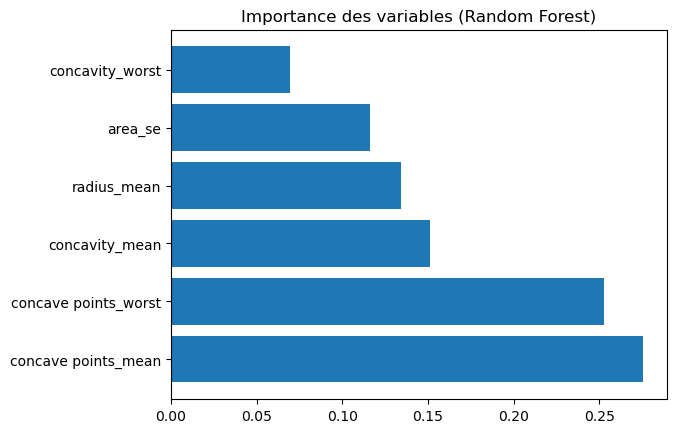

In [375]:
# Visulation des features importantes
#import matplotlib.pyplot as plt

# Création d'un DataFrame pour les importances
feature_importances = pd.DataFrame({
     'Feature': X_selected_rf.columns,
     'Importance': rf.feature_importances_
 }).sort_values(by='Importance', ascending=False)

# Visualisation
#plt.figure(figsize=(10,6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Importance des variables (Random Forest)')
plt.show()

### Modèle de regression logistique

In [376]:
# Entrainement de la régression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000)

In [377]:
# Evaluaiton du modèle
Y_pred_logreg = logreg.predict(X_test_scaled)
print("\n=== Performance Régression Logistique ===")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_logreg):.2f}")
print(confusion_matrix(Y_test, Y_pred_logreg))
print(classification_report(Y_test, Y_pred_logreg))


=== Performance Régression Logistique ===
Accuracy: 0.94
[[102   6]
 [  5  58]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       108
           1       0.91      0.92      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



#### Je remarque que le modèle de regression à une meilleure performance, précision et recall je décide donc de l'utiliser pour ma Webapp

In [378]:
# Visualisation des variables (features) importantes
# Je crée un DataFrame avec les coefficients et les noms des variables
coef_df = pd.DataFrame({
    'Variable': X_train.columns, 
    'Coefficient': logreg.coef_[0]  # [0] car coef_ retourne un tableau 2D pour les modèles binaires
})

# Trier par importance absolue (prise en compte des coef négatifs)
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)

# Afficher le tableau des coefficients
print("\n=== Coefficients de régression ===")
print(coef_df.to_string(index=False))  # Pour masquer l'index



=== Coefficients de régression ===
            Variable  Coefficient
             area_se     2.500632
concave points_worst     1.801260
         radius_mean     1.312293
 concave points_mean     1.214291
     concavity_worst     1.135476
      concavity_mean    -1.091296


In [379]:
# Je choisis uniquement les variables d'importance pour la WebApp
# car j'ai eu un beug dans ma première version
selected_features = [
     "radius_mean", 
     "concave points_mean",
     "radius_se",
     "area_se", 
     "texture_worst", 
     "concavity_worst"
 ]
# Je les sélectionne dans mon dataset
X_selected = df_clean[selected_features]
Y = df_clean.iloc[:, 1]

# Je split à nouveau mes données
X_train, X_test, Y_train, Y_test = train_test_split(
     X_selected, Y, test_size=0.3, random_state=42
 )

# Je normalise uniquement ces variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Je réentraine mon modèle
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, Y_train)

# classification_report

Y_pred_logreg = logreg.predict(X_test_scaled)
print("\n=== Performance Régression Logistique ===")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_logreg):.2f}")
print(confusion_matrix(Y_test, Y_pred_logreg))
print(classification_report(Y_test, Y_pred_logreg))


=== Performance Régression Logistique ===
Accuracy: 0.96
[[106   2]
 [  4  59]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [380]:
probas = logreg.predict_proba(X_test_scaled)
print("Échantillon de probabilités:", probas[:10])

Échantillon de probabilités: [[9.35714312e-01 6.42856881e-02]
 [2.13822014e-03 9.97861780e-01]
 [5.59880557e-02 9.44011944e-01]
 [9.90871523e-01 9.12847668e-03]
 [9.97684967e-01 2.31503306e-03]
 [2.99271918e-08 9.99999970e-01]
 [9.91083111e-07 9.99999009e-01]
 [9.77458366e-02 9.02254163e-01]
 [5.94585657e-01 4.05414343e-01]
 [9.95917820e-01 4.08217985e-03]]


In [381]:
# 8. Je sauvegarde mes modèles
joblib.dump(logreg, 'modele_regression.pkl')
joblib.dump(rf, 'modele_random_forest.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']